# Project: Investigate The Movie Database 

___
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

___
<a id='intro'></a>
## Introduction

* This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.<br>
* I put myself in the position of a filmmaker to pick one or several genres into the list of recommendations for producers.<br>
* Questions that I plan on exploring:
    1. Which genres are most popular from 2013 to 2015? 
    2. 5 genres make the most profit from 2013 to 2015?

In [216]:
# import libraries use in project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

___
<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [217]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_origin= pd.read_csv("tmdb-movies.csv")
df_origin.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<div class="alert alert-block alert-warning">
<b>Note:</b> we clearly see here there are some columns in the format like array that we need to handle later like <b>cast</b>, <b>genres</b>. And a lot of unnecessary columns need to be removed
</div>

In [218]:
# row and colum
df_origin.shape

(10866, 21)

<div class="alert alert-block alert-warning">
<b>Note:</b> We have 10866 rows and 21 columns in the original dataframe
</div>

In [219]:
# general info
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<div class="alert alert-block alert-warning">
<b>Note:</b> 21 column seems there are so many null values in homepage, tagline,,,. And wrong format value in release_date
</div>

In [220]:
# We can see clearly number of null values in here
df_origin.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<div class="alert alert-block alert-warning">
<b>Note:</b> More specifically in the columns <b>homepage</b>, <b>tagline</b>, <b>keywords</b>, <b>production_companies</b>
</div>

In [221]:
# count unique value
df_origin.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [222]:
# duplicate value
sum(df_origin.duplicated())

1

<div class="alert alert-block alert-warning">
<b>Note:</b> Seem just 1 duplicate value
</div>

In [223]:
df_origin.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<div class="alert alert-block alert-warning">
<b>Note:</b> There are some anomalies in the data, 50% of data have budget and revenue of 0. we have to ignore and not include in any analysis related to profit
</div>

___
### Data Cleaning (drop columns, duplicates, null, split genres, create profit column, filter year!)

__First we have to drop columns not relate to our analyst__

In [224]:
# drop column not relavant and have so much null value
df_clean = df_origin.drop(columns=['id', 'imdb_id', 'budget','revenue','original_title', 'cast', 'homepage', 'director', 'tagline','keywords', 'overview', 'runtime', 'release_date', 'vote_count', 'vote_average', 'production_companies'])
df_clean.head()

,popularity,genres,release_year,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


<div class="alert alert-block alert-warning">
<b>Note:</b> Because my report helps with current needs, only the columns related to adjusted revenue, adjusted budget, genres and their popularity are kept.
</div>

In [225]:
# drop duplicated value
df_clean.drop_duplicates(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10865 non-null  float64
 1   genres        10842 non-null  object 
 2   release_year  10865 non-null  int64  
 3   budget_adj    10865 non-null  float64
 4   revenue_adj   10865 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 509.3+ KB


In [226]:
# drop null value
df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10842 non-null  float64
 1   genres        10842 non-null  object 
 2   release_year  10842 non-null  int64  
 3   budget_adj    10842 non-null  float64
 4   revenue_adj   10842 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 508.2+ KB


<div class="alert alert-block alert-warning">
<b>Note:</b> Basically just drop the duplicate value along with the null value
</div>

In [227]:
multi_genres = df_clean[df_clean['genres'].str.contains('|')]
multi_genres.shape

(10842, 5)

<div class="alert alert-block alert-warning">
<b>Note:</b> Check number of row have multi genres
</div>

In [228]:
Series_check_len_genres = df_clean['genres'].apply(lambda x: len(x.split('|')))
Series_check_len_genres.max()

5

<div class="alert alert-block alert-warning">
<b>Note:</b> We have 10842 rows and all genres in df contain '|'. And max genres of 1 film is 5, so we have to spread the genres for our analysis in the following code cell 
</div>

In [229]:
# extracting the substrings from genres
df_clean = df_clean.assign(genres=df_clean['genres'].str.split('|')).explode('genres')
df_clean.head()

,popularity,genres,release_year,budget_adj,revenue_adj
0,32.985763,Action,2015,1.379999e+08,1.392446e+09
0,32.985763,Adventure,2015,1.379999e+08,1.392446e+09
0,32.985763,Science Fiction,2015,1.379999e+08,1.392446e+09
0,32.985763,Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,Action,2015,1.379999e+08,3.481613e+08


In [230]:
# create profit column
df_clean['profit']= df_clean.revenue_adj - df_clean.budget_adj
df_clean.head()

,popularity,genres,release_year,budget_adj,revenue_adj,profit
0,32.985763,Action,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Adventure,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Science Fiction,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Thriller,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Action,2015,1.379999e+08,3.481613e+08,2.101614e+08


<div class="alert alert-block alert-warning">
<b>Note:</b> because we care about profit so we have to create profit column equal revenue substract budget
</div>

In [231]:
#filter data from 2013 to 2015
df_clean_filter = df_clean.query('release_year <= 2015 and release_year >=2013')
df_clean_filter.shape

(4239, 6)

<div class="alert alert-block alert-warning">
<b>Note:</b> Also we just care about recent year so we have to filter from 2013 to 2015
</div>

<a id='eda'></a>


## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from 2010 to 2015?)

Question is which genres are most popular so we need to find out the popularity of each genres, that's why we need groupby to see the result

In [232]:
# get dataframe for Q1
df_res_Q1 = df_clean_filter.groupby(by = ['genres']).mean().popularity
df_res_Q1

genres
Action             1.624567
Adventure          2.334494
Animation          1.038377
Comedy             0.800885
Crime              1.124602
Documentary        0.167841
Drama              0.824605
Family             1.092812
Fantasy            1.509511
History            0.961506
Horror             0.483638
Music              0.549745
Mystery            0.947796
Romance            0.711834
Science Fiction    1.967719
TV Movie           0.273488
Thriller           1.056715
War                1.266583
Western            1.674148
Name: popularity, dtype: float64

First we need to know the distribution of genres to understand the supply of this industry to the viewers, barh chart help us compare each genres easier to see the different.

In [233]:
def hist_plot(df,name,figsize=(15,10)):
    column_plot = df_clean_filter[name].value_counts()
    column_plot[df_res_Q1.index].plot(kind='barh', figsize=figsize, title='Distribution of {}'.format(name.capitalize()));

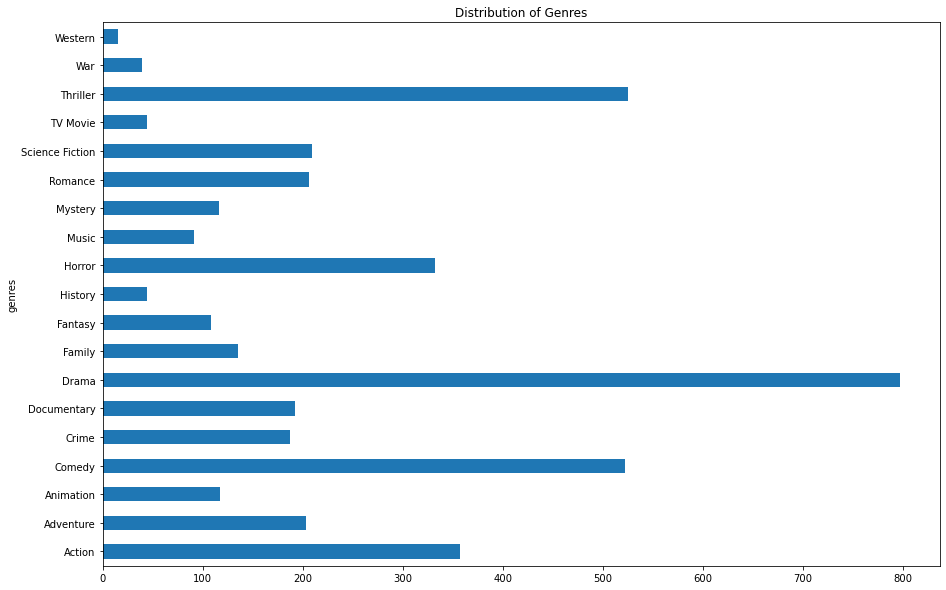

In [234]:
hist_plot(df_clean_filter,'genres')

<div class="alert alert-block alert-warning">
<b>Note:</b> We can see here Dramma, Comedy, and Thriller are the 3 most produced genres from 2013 to 2015.<br>
    Drama with nearly 800 movies, comedy more than 500 and thriller more than 500.
</div>

Next we explore about the genres popularity through barh chart, barh chart help us compare each genres easier to see the different.

In [235]:
#plot barh
def plot_2d_barh(df_index, df, title, xlabel, ylabel,figsize=(15,10)):
    plt.subplots(figsize=figsize)
    plt.barh(df_index, df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

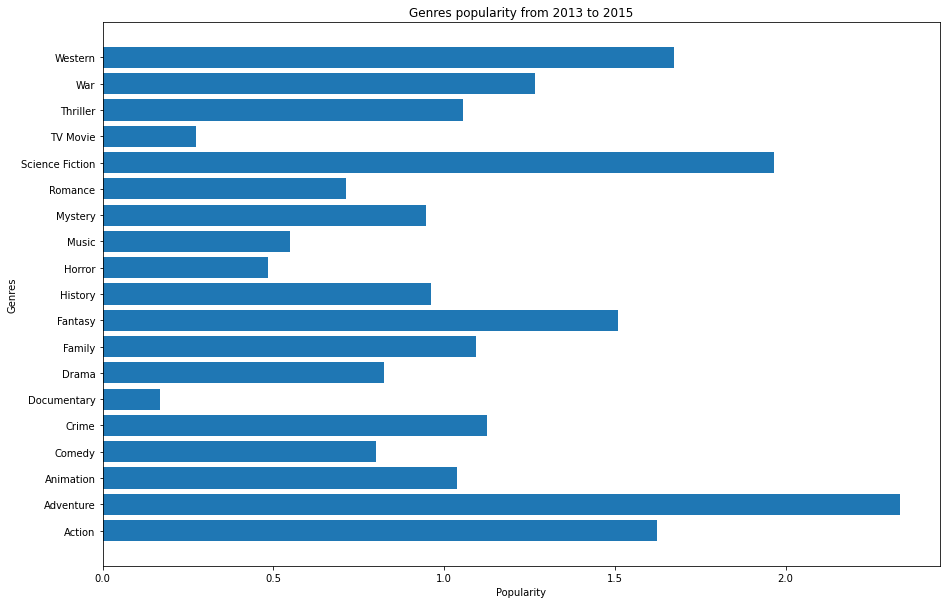

In [236]:
plot_2d_barh(df_res_Q1.index,df_res_Q1, 'Genres popularity from 2013 to 2015', 'Popularity', 'Genres')

<div class="alert alert-block alert-warning">
<b>Note:</b> We can see here Adventure, Science Fiction, and Western are the 3 most popular genres from 2013 to 2015.<br>
</div>

### Research Question 2  (5 genres make the most profit from 2013 to 2015!)

Question is 5 genres make the most profit from 2013 to 2015 so we need to find out the total profit of each genres and get 5 largest, that's why we need sum and groupby, and nlargest

In [237]:
# create dataframe for Question 2 sum all the profit and take 5 largest number

df_res_Q2 = df_clean_filter.groupby(by = ['genres']).sum()['profit'].nlargest(5)
df_res_Q2.head()

genres
Adventure          2.293118e+10
Action             2.258175e+10
Science Fiction    1.608571e+10
Comedy             1.367058e+10
Thriller           1.209694e+10
Name: profit, dtype: float64

We need to compare each genres's profit with the total of industry so we need to find the others profit, after that we can plot a pie chart to see what the contribution of each genres in the industry

In [238]:
# count other genres's profit
total_profit = df_clean_filter.sum().profit
other_profit = total_profit - df_res_Q2.sum()
other = pd.Series(other_profit)
df_res_Q2 = pd.concat([df_res_Q2, other], ignore_index = True)
df_res_Q2.head(6)

0    2.293118e+10
1    2.258175e+10
2    1.608571e+10
3    1.367058e+10
4    1.209694e+10
5    5.354666e+10
dtype: float64

In [239]:
def plot_pie(df, title, labels,figsize=(6,6)):
    plt.subplots(figsize=figsize)
    plt.pie(df, labels = labels)
    plt.title(title);

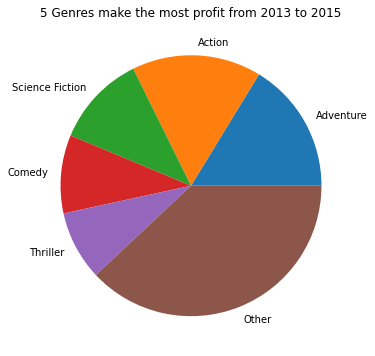

In [240]:
df_res_Q2_labels=['Adventure', 'Action', 'Science Fiction', 'Comedy', 'Thriller', 'Other']
plot_pie(df_res_Q2,'5 Genres make the most profit from 2013 to 2015',df_res_Q2_labels)

<div class="alert alert-block alert-warning">
<b>Note:</b> We can see here Adventure are the genres make most profit at all.<br>
    This 5 genres make more than 50% of all the industry
</div>

<a id='conclusions'></a>
## Conclusions


>  1. Drama is the genre most produce from 2013 to 2015.<br>
>  2. Adventure is the genre most popular from 2013 to 2015.<br>
>  3. Adventure also the genre with movies that have the most profit from 2013 to 2015.<br>
>  4. Documentary is the least popular genre from 2013 to 2015.<br>
>  5. 5 genres have the most profit from 2013 to 2015 accounts for more than half of the industry's profits from 2013 to 2015<br>

<a id='limitations'></a>
___
## Limitations 
>  1. We are working with sample data, which implies uncertainty (a different sample may lead to different results).<br>
>  2. We find issues with the sample of data that we are working with, the missing budget, missing revenue,,,.<br>

<a id='reference'></a>
## Reference

>  1. https://stackoverflow.com/questions/17116814/how-to-split-text-in-a-column-into-multiple-rows